# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read csv file and tranformed into dataframe 

df=pd.read_csv('H:\Python\Copper Project\Copper_Set.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
# verify the unique items in every features

for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [ ]:
#convert the data type from object to numeric

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [ ]:
# make additional feature from date's columns 

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [ ]:
#verify the data type of each features

df.dtypes

id                             object
item_date              datetime64[ns]
quantity tons                 float64
customer                      float64
country                       float64
status                         object
item type                      object
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                     int64
delivery date          datetime64[ns]
selling_price                 float64
delivery_time_taken           float64
dtype: object

In [ ]:
#checking null values in each features

df.isnull().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [ ]:
# handling some unwanted values start with ('00000') and checking null values

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.isnull().sum()

id                          2
item_date                   3
quantity tons               1
customer                    1
country                    28
status                      2
item type                   0
application                24
thickness                   1
width                       0
material_ref           100645
product_ref                 0
delivery date               3
selling_price               1
delivery_time_taken         6
dtype: int64

In [ ]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [ ]:
# quantity and selling price values are not below 0. so we convert to null for below 0 value

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00000,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [ ]:
df.isnull().sum()

quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
dtype: int64

In [ ]:
# Handling null values using median and mode

df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_time_taken'].fillna(df['delivery_time_taken'].median(),inplace=True)

In [ ]:
# verify null values for each features

df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [ ]:
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


# skewness and outliers

In [ ]:
#copy the dataframe to another to check the skewness and outliers

df_1=df.copy()
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0


In [ ]:
#checking the skew for each features

for col in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
    print(col)
    print(skew(df_1[col]))

quantity tons
424.68730994731504
customer
86.9845901502091
country
0.7538286488466676
application
0.7245583983073829
thickness
303.4450657126513
width
0.37459367901082125
product_ref
1.0152071910463223
selling_price
301.38559971625915
delivery_time_taken
0.46972996509615955


In [ ]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

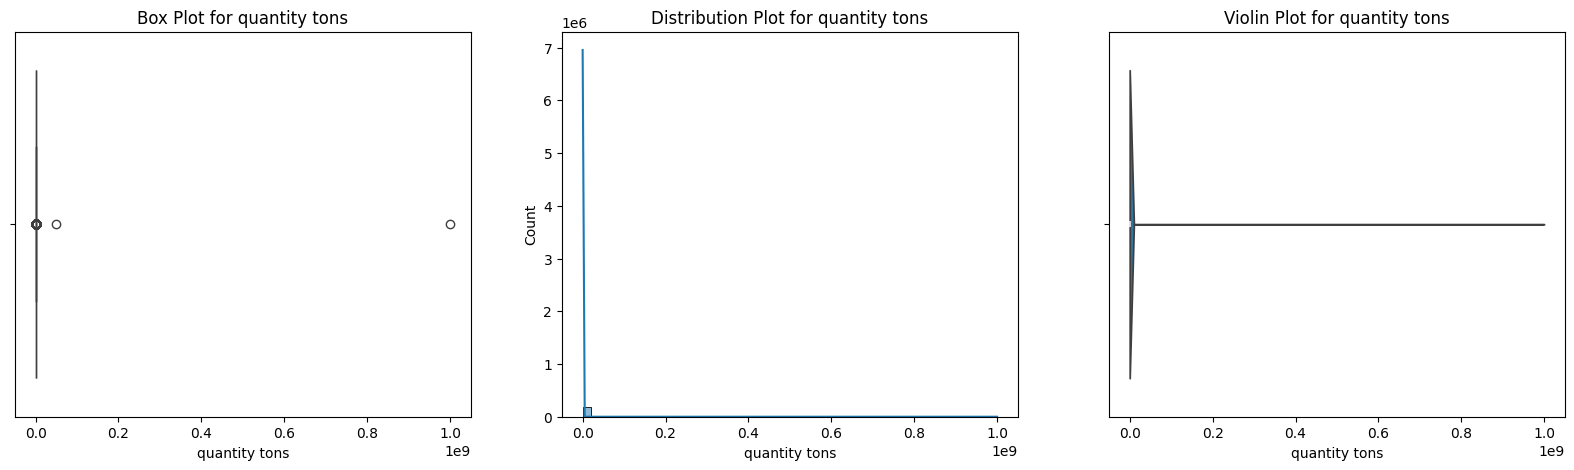

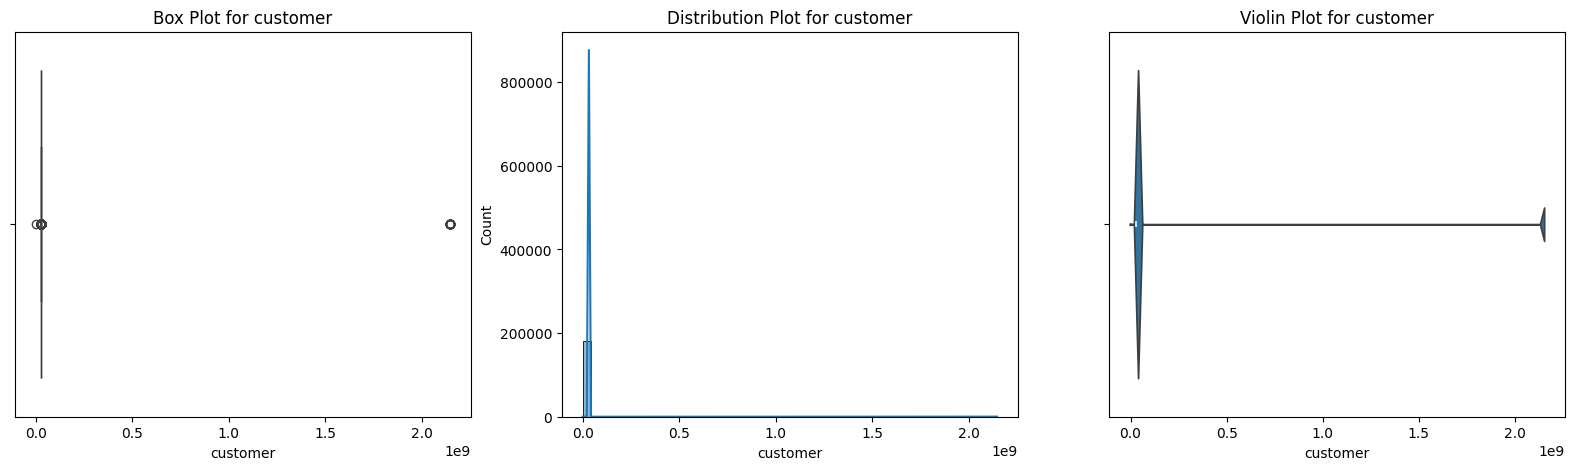

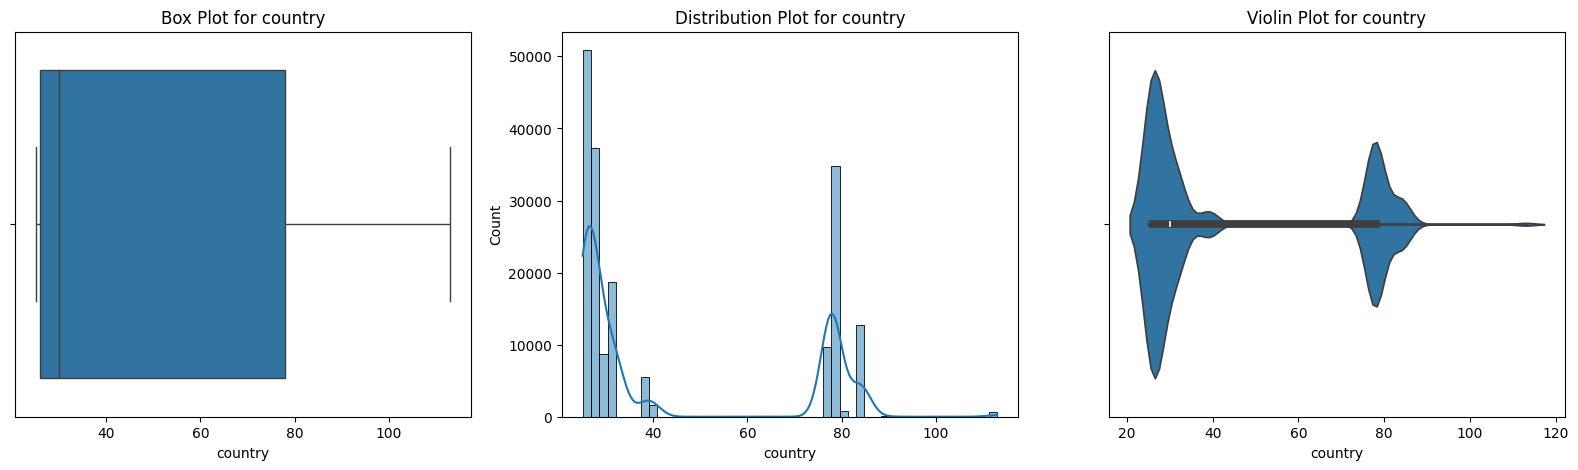

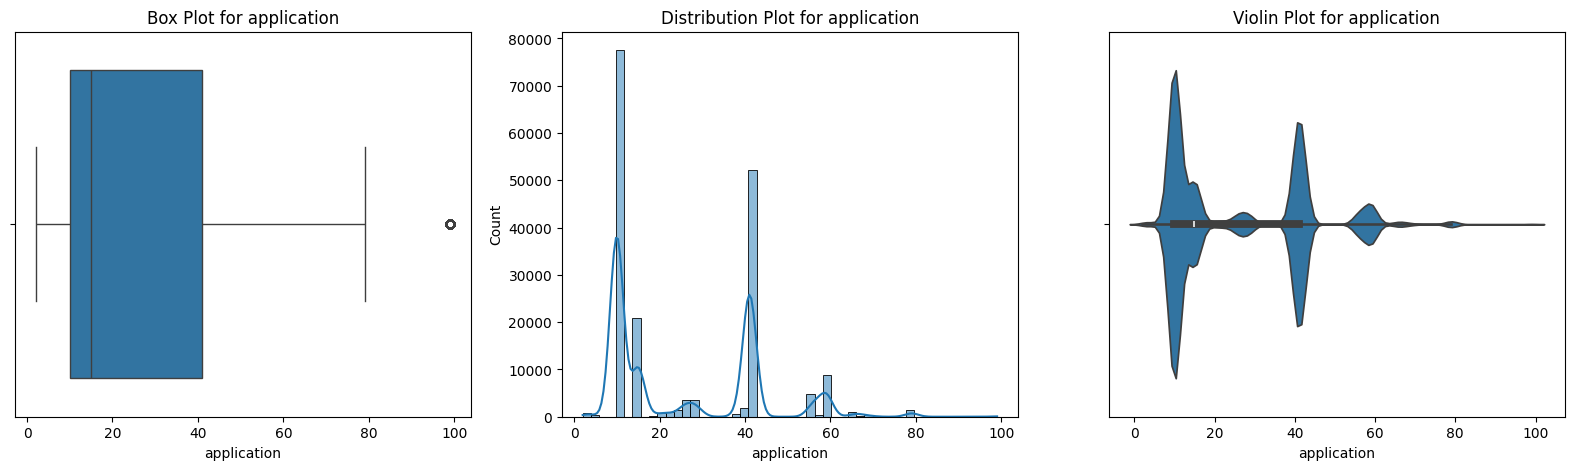

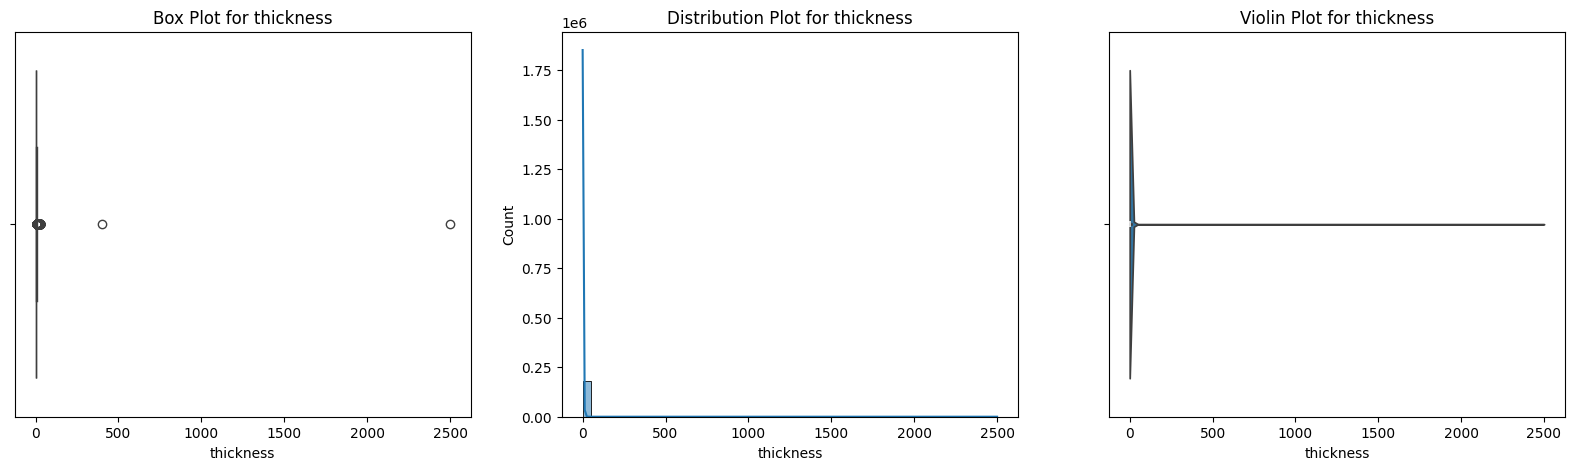

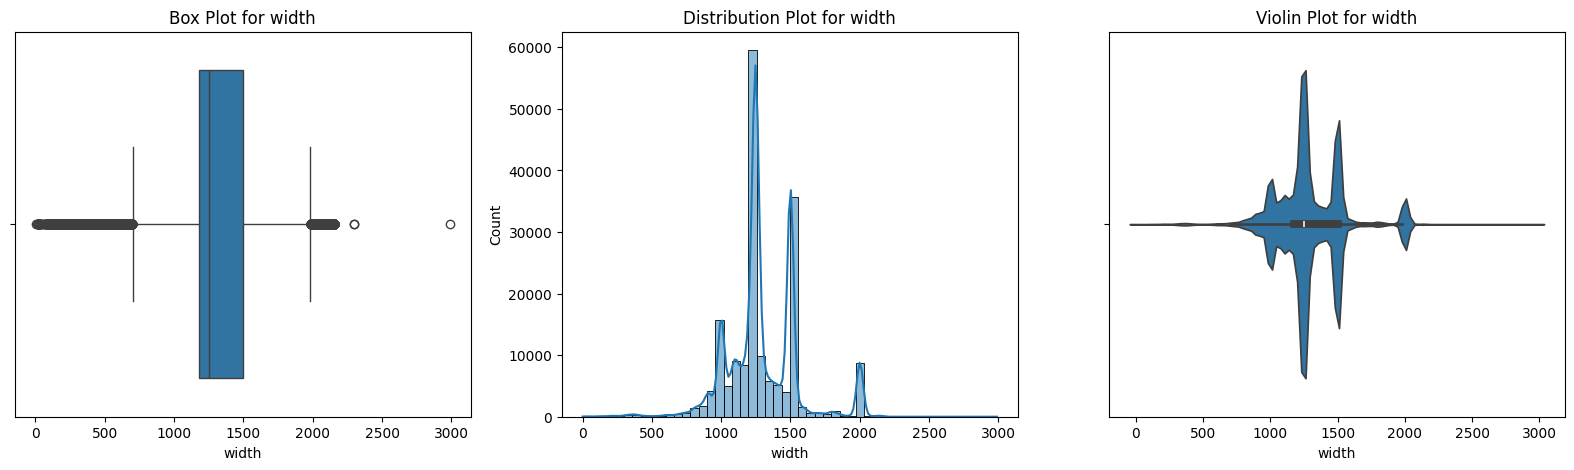

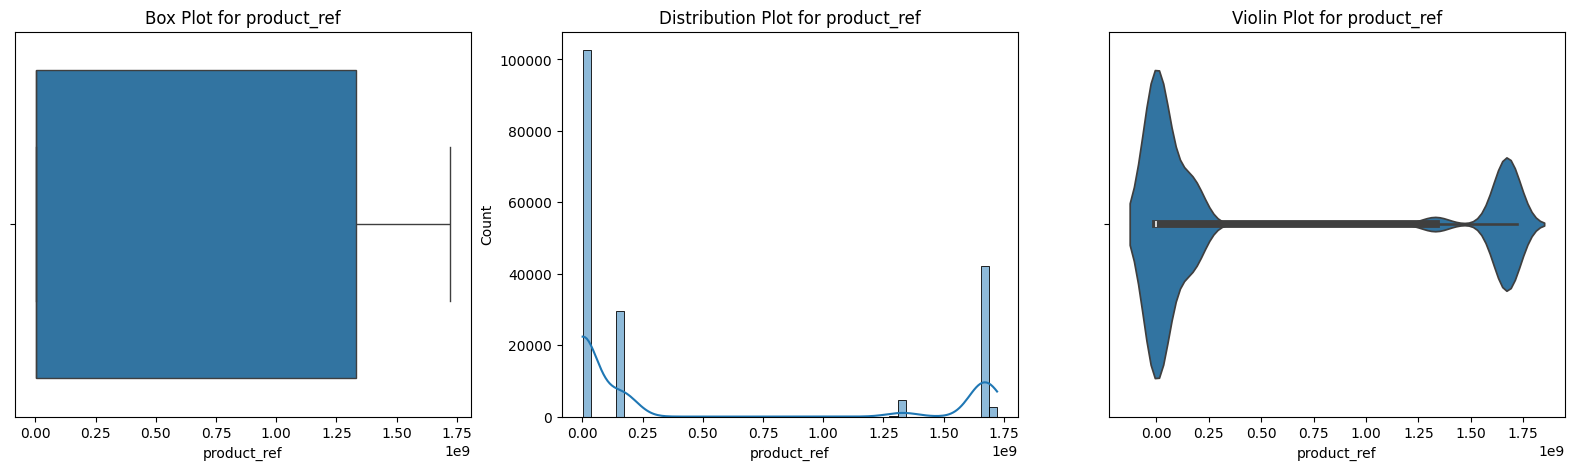

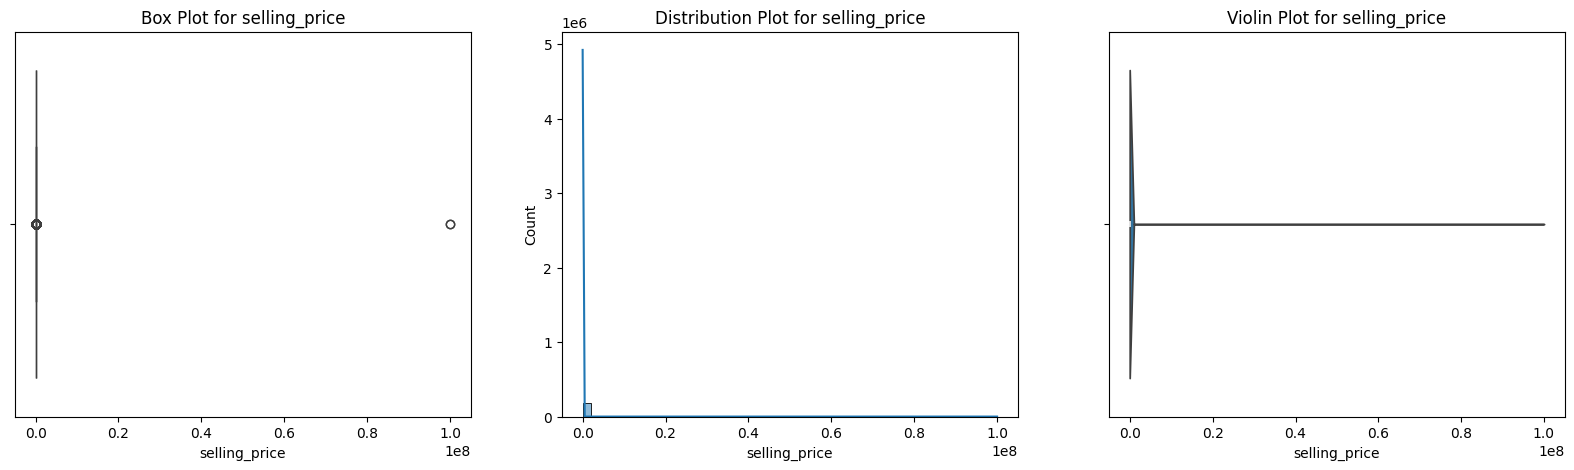

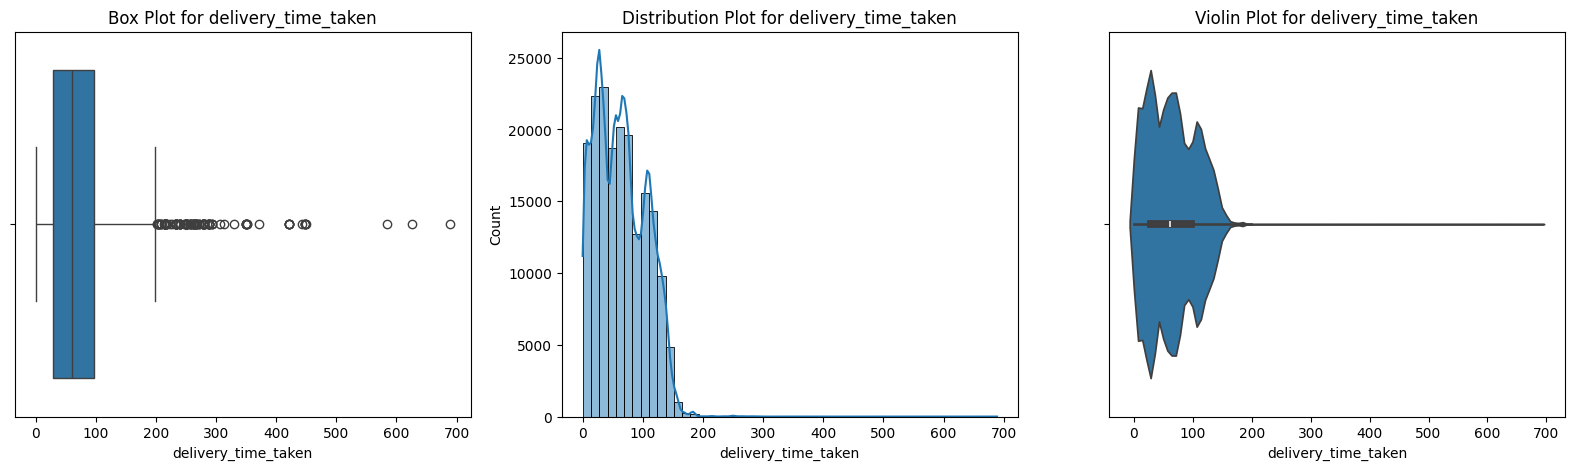

In [ ]:
# plotting the features to check skew and outliers

for i in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
    plot(df_1, i)

In [ ]:
# handling skew with log transformation method

df_1['quantity_tons_log']=np.log(df_1['quantity tons'])
df_1['thickness_log']=np.log(df_1['thickness'])
df_1['selling_price_log']=np.log(df_1['selling_price'])
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0,6.666354,1.386294,6.357842


In [ ]:
df_1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df_1.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,31.0,6.666354,1.386294,6.357842


In [ ]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# using outlier function handle the outliers for the below features

outlier(df_1,'quantity_tons_log')
outlier(df_1,'thickness_log')
outlier(df_1,'selling_price_log')
outlier(df_1,'width')
df_1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


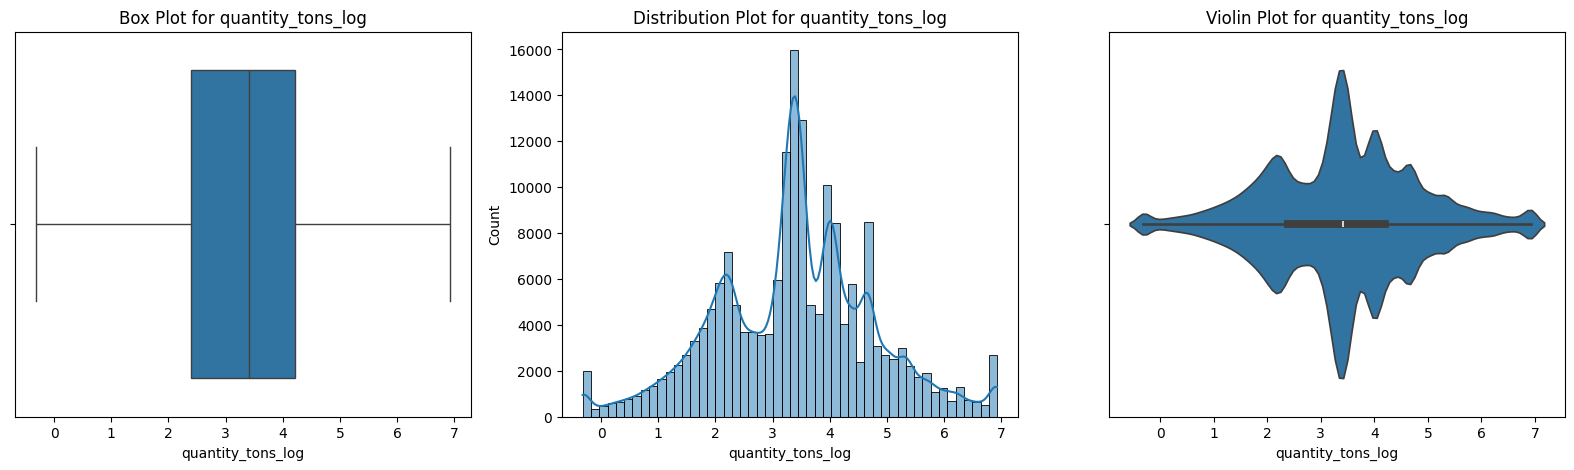

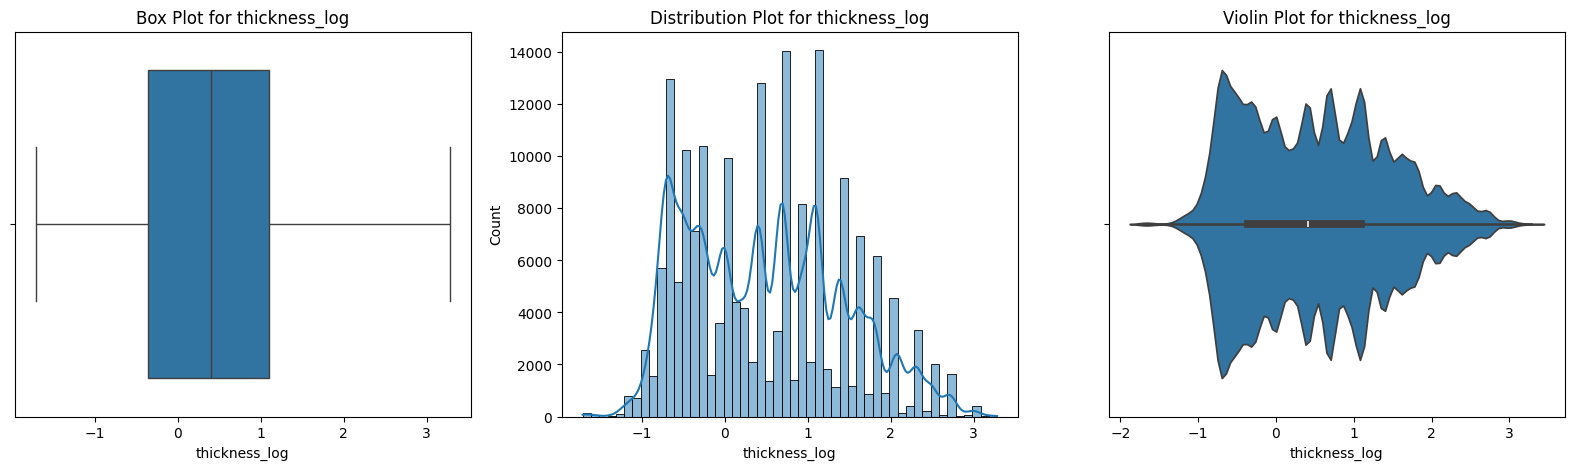

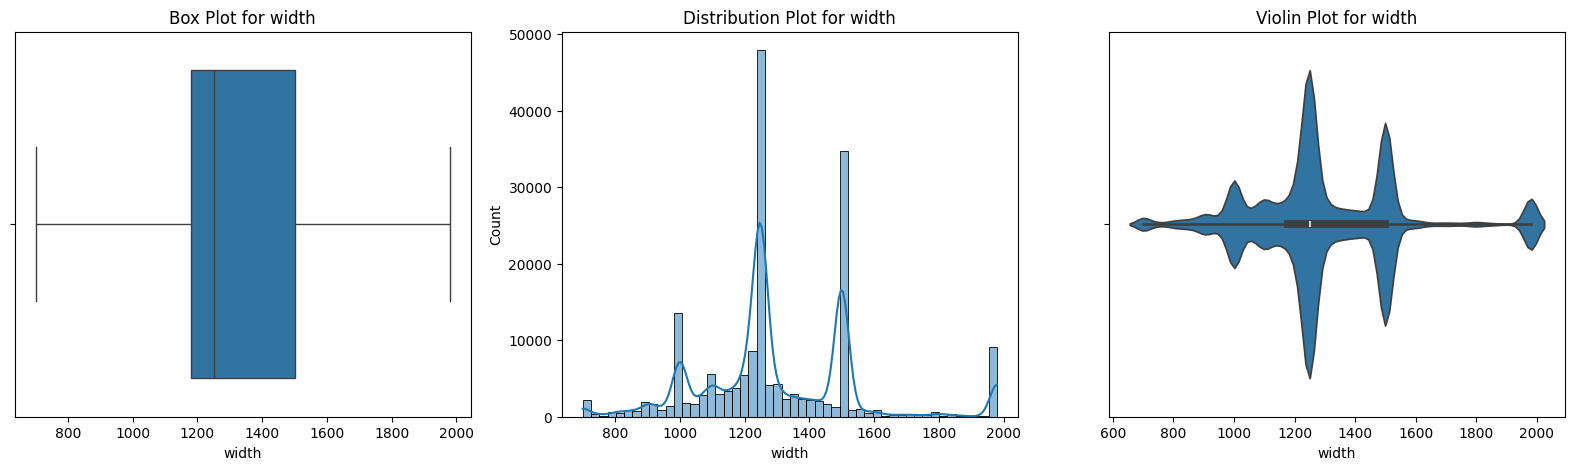

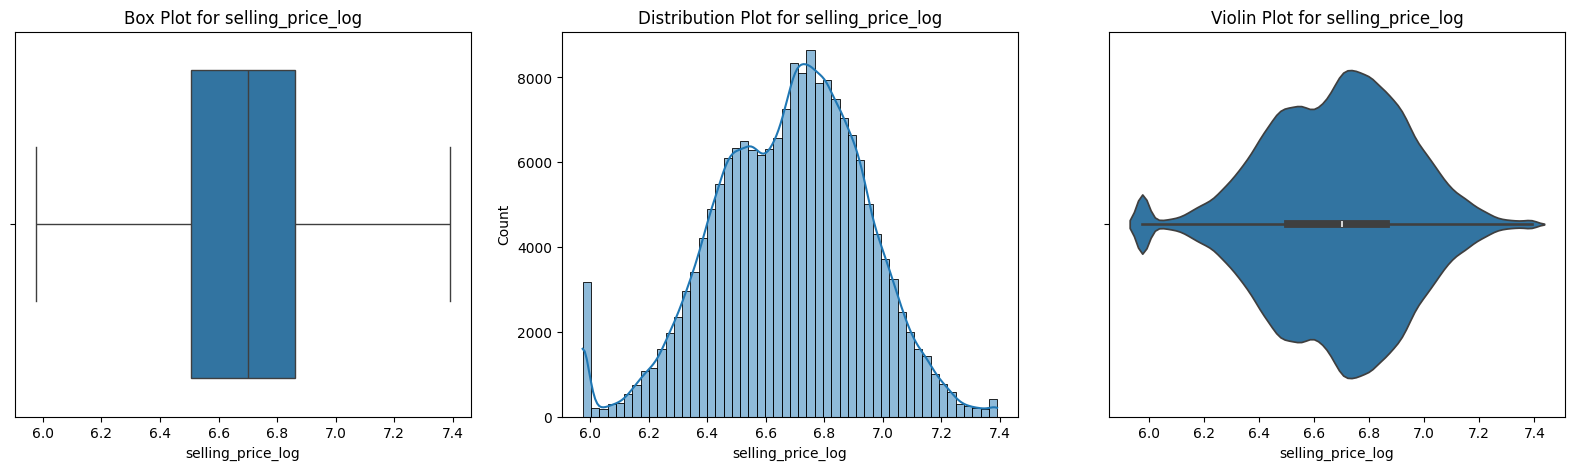

In [ ]:
#plotting after skew and outliers 

for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df_1, i)

<Axes: >

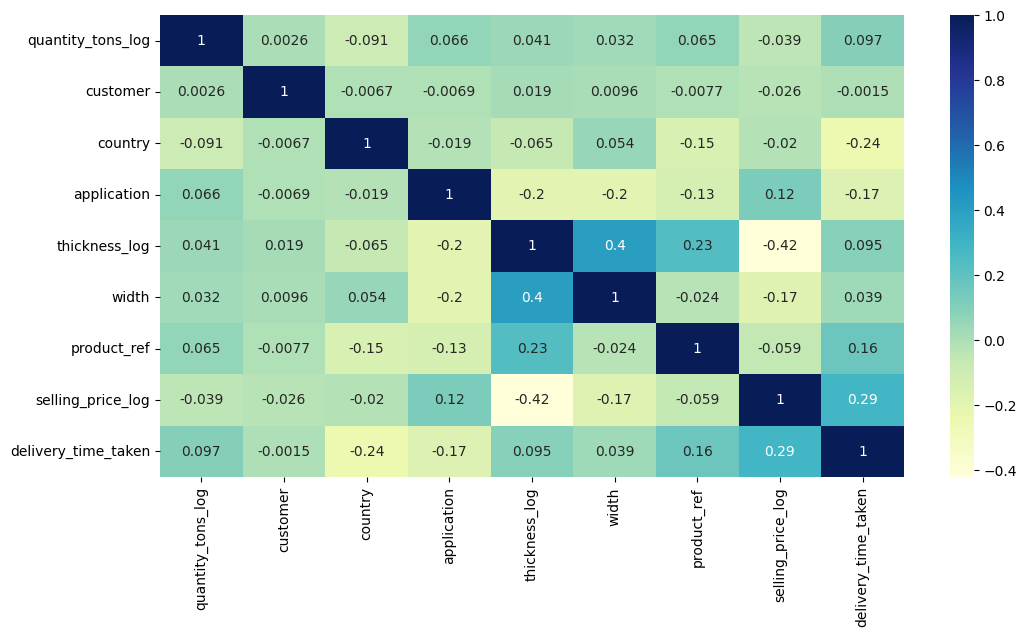

In [ ]:
# verify any columns are highly correlated using Heatmap

cor=df_1[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_time_taken']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True, cmap="YlGnBu")

# Regression model to predict selling price

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np
import pickle

In [ ]:
df_2=df_1.copy()
df_2

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [ ]:
#checking values count to encoding the catogorical features

df_2["status"].value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [ ]:
# using map function encoding the values in status column

df_2["status"]= df_2["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df_2['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [ ]:
#checking values count to encoding the catogorical features

df_2['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [ ]:
# using ordinalencoder to encode the values in item type column

df_2["item type"]= OrdinalEncoder().fit_transform(df_2[["item type"]])
df_2['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
df_2.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842


In [ ]:
# function to choose the best algorithm

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price_log'],axis=1)
        y=df['selling_price_log']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [ ]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = best_ML_algorithm(df_2, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)


**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.162836            0.045489                 0.213281  0.302651
DecisionTreeRegressor                 0.054212            0.010189                 0.100941  0.843799
ExtraTreesRegressor                   0.046487            0.005754                 0.075852  0.911796
RandomForestRegressor                 0.045910            0.005549                 0.074495  0.914925
GradientBoostingRegressor             0.118057            0.021458                 0.146487  0.671040
XGBRegressor                          0.079373            0.011073                 0.105230  0.830243
**Best Algorithm:** RandomForestRegressor


In [ ]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x=df_2.drop(columns=['selling_price_log'],axis=1)
y=df_2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,20],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'log2', None] }


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.8952929785443692))

In [ ]:
# with best algorithm matching the parameter from above result and train the model

x=df_2.drop(columns=['selling_price_log'],axis=1)
y=df_2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.04865670494149515
Mean Squared Error: 0.005851891925041096
Root Mean Squared Error: 0.07649765960499116
R-squared: 0.9102894678604176


In [ ]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

product_ref            0.295662
delivery_time_taken    0.245779
status                 0.173063
country                0.072261
customer               0.067352
thickness_log          0.043541
quantity_tons_log      0.042084
application            0.023018
item type              0.019436
width                  0.017804
dtype: float64

In [ ]:
# store the model using pickle

with open('H:\Python\Copper Project\Regressor.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [ ]:
#load the pickle and predict the selling price with regressor model

with open('H:\Python\Copper Project\Regressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])

np.float64(779.8488645142141)

# Classifier Model to predict the Status

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [ ]:
#filter out the values (won|lost) in status column

df_c=df_2[(df_2.status==1)|(df_2.status==0)]
df_c

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [ ]:
#checking balance of the status values

df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

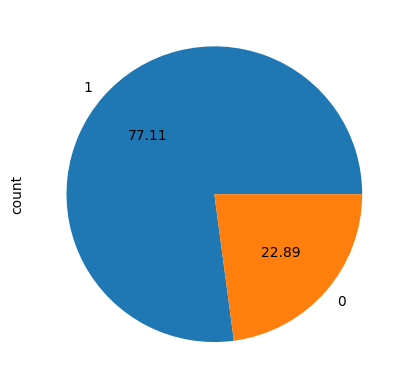

In [ ]:
ax=df_c['status'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'over oversampling using smote')

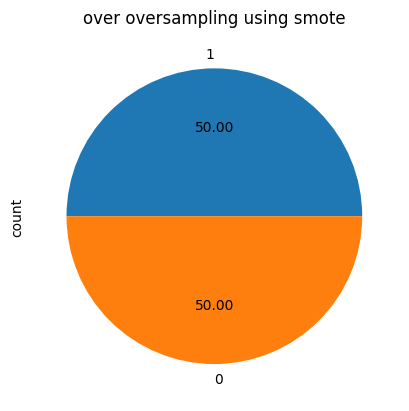

In [ ]:
# oversampling the data using SMOTE 

x=df_c.drop('status',axis=1)
y=df_c['status']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y) 

ax=y_smote.value_counts().plot.pie(autopct='%.2f')
ax.set_title('over oversampling using smote')

In [ ]:
#function to get the best classifier algorithm

def best_ML_class_algo(x_smote,y_smote,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [ ]:
# using above function try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]
best_algorithm, results = best_ML_class_algo(x_smote,y_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.955609   0.955880  0.954775  0.955327
ExtraTreesClassifier              0.977747   0.988214  0.966768  0.977373
RandomForestClassifier            0.975707   0.985830  0.965005  0.975306
GradientBoostingClassifier        0.804663   0.823758  0.772316  0.797208
XGBClassifier                     0.932493   0.950717  0.911458  0.930674
**Best Algorithm:** ExtraTreesClassifier


In [ ]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators' :[50,100],
    'max_depth': [ 10,20,25],     
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]     }


model = ExtraTreesClassifier(random_state=42) 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 25,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.9623682387426182))

In [ ]:
# with best algorithm matching the parameter from bove result and train the model

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

model_classifier = ExtraTreesClassifier(n_estimators=100,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model_classifier.fit(x_train, y_train)

y_pred = model_classifier.predict(x_test)

# evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[34666   337]
 [ 2021 32584]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35003
           1       0.99      0.94      0.97     34605

    accuracy                           0.97     69608
   macro avg       0.97      0.97      0.97     69608
weighted avg       0.97      0.97      0.97     69608



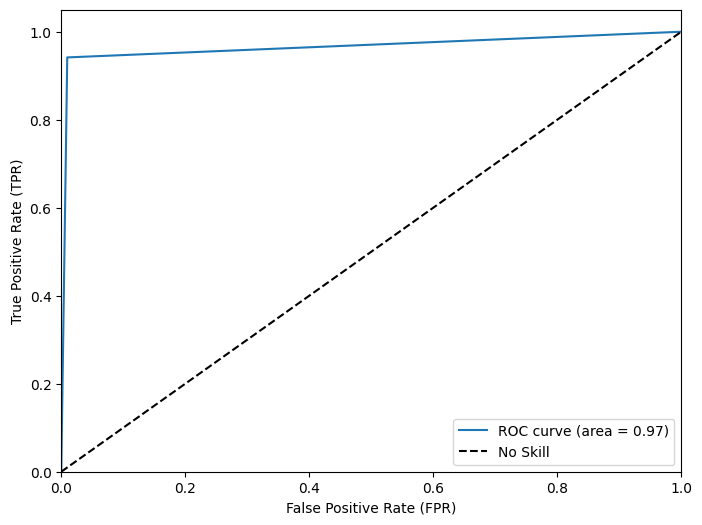

In [ ]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken    0.183399
item type              0.133809
customer               0.127373
country                0.113107
application            0.107224
quantity_tons_log      0.089335
selling_price_log      0.076929
thickness_log          0.063496
product_ref            0.063175
width                  0.042153
dtype: float64

In [ ]:
# store the model using pickle

with open('H:\Python\Copper Project\Classifier.pkl','wb') as  files:
    pickle.dump(model_classifier,files)

In [ ]:
# load the pickle and predict the status with classifier model

with open('H:\Python\Copper Project\Classifier.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Won
